In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv("../data/iris/iris.data", header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
data_filtered = data[data[4].isin(['Iris-setosa', 'Iris-versicolor'])]
data_filtered[4] = data_filtered[4].apply(lambda x: 1 if x == 'Iris-setosa' else -1)
data_filtered.head()

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [41]:
data_array = data_filtered.values
X = data_array[:, :2]
y = data_array[:, 4]
X.shape, y.shape

((100, 2), (100,))

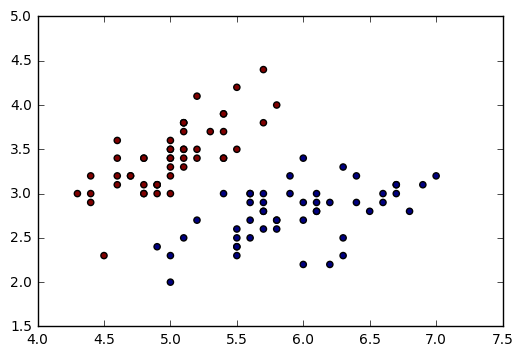

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:,0], X[:,1], c=y)

In [43]:
from sklearn.svm import SVC
clf = SVC(C=10000, kernel='linear')
clf.fit(X,y)
(clf.predict(X) == y).sum()

100

In [58]:
from src.user import DummyUser
from src.active_learning.svm import SVMClosest, SolverMethod
from src.active_learning.base import train
from src.initial_sampling import FixedSizeStratifiedSampler

user = DummyUser(max_iter=100, y_true=y)
#al = SVMClosest(C=10000, kernel='linear')
al = SolverMethod(pool_size=5, C=10000, kernel='linear')
initial_sampler = FixedSizeStratifiedSampler(sample_size=2)
train(data=X, user=user, active_learner=al, initial_sampler=initial_sampler)

In [59]:
(al.predict(X) == y).sum()

100

In [60]:
al.clf.coef_, clf.coef_

(array([[-6.31383467,  5.26204555]]), array([[-6.31408573,  5.26221019]]))